In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [15]:
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc
font_path = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# customer_merge 시각화

# 데이터 불러오기

In [8]:
df_raw_cm = pd.read_csv("customer_merge.csv", engine='python')
df_raw_cm.head()

,Unnamed: 0,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region
0,0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인
1,1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시
2,2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시
3,3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도
4,4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도


In [10]:
#필요없는 컬럼 삭제
df_cm = df_raw_cm.drop(["Unnamed: 0"],axis = 1)
df_cm.head()

,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region
0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인
1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시
2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시
3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도
4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도


# 데이터 분할

In [76]:
#상품구매금액의 편차가 너무 커서 200만원을 기준으로 데이터를 분할함.
#200만원을 기준으로 잡은 이유는 200만원 이하에 데이터가 몰려있기 때문임.
df_up_200 = df_cm[df_cm["상품구매금액"]>2000000]
df_down_200 = df_cm[df_cm["상품구매금액"]<=2000000]


# 상품구매금액 - 나이 (scatter plot)

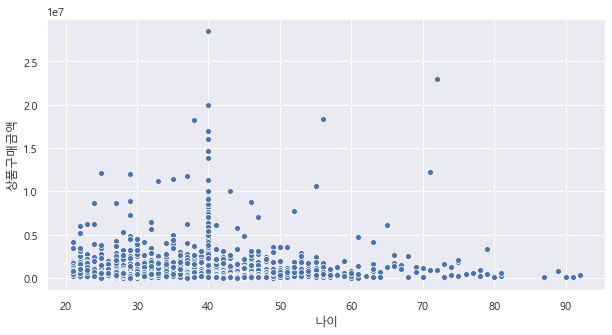

In [82]:
#금액 구분없는 전체 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.scatterplot(x = "나이", y = "상품구매금액",data = df_cm)

# 40살인 사람의 구매금액은 최저금액에서 최고금액까지 매우 다양함.

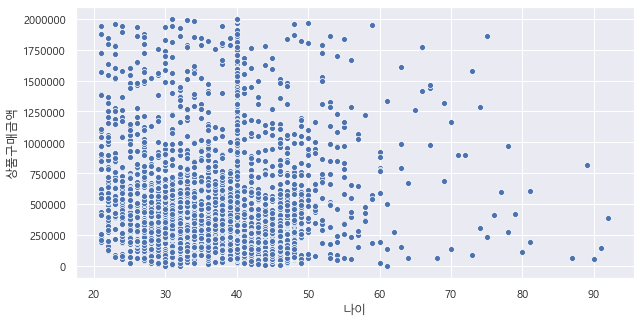

In [83]:
#구매금액이 200만원 이하인 사람들의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.scatterplot(x = "나이", y = "상품구매금액",data = df_down_200)
# 100만원 이하의 상품을 구매한 고객이 대다수이며 나이는 20~50살 정도가 가장 많음

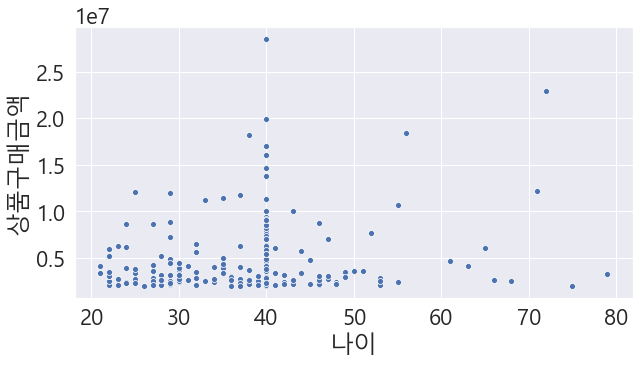

In [84]:
#구매금액이 200만원 이상인 사람들의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.scatterplot(x = "나이", y = "상품구매금액",data = df_up_200)

# 상품구매금액 - 가입최종주문기간 (scatter plot)

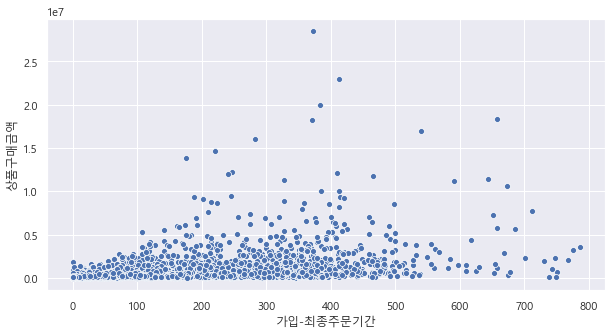

In [133]:
#구매금액이 200만원 이하인 사람들의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.scatterplot(x = "가입-최종주문기간", y = "상품구매금액",data = df_cm)

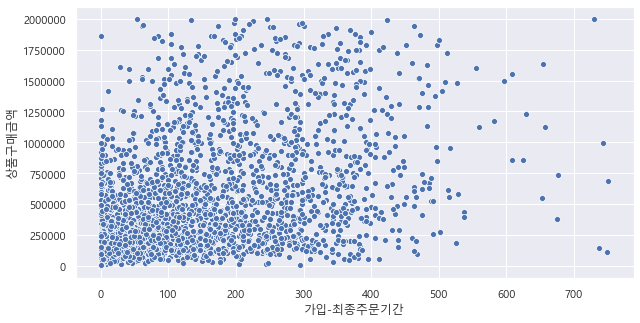

In [130]:
#구매금액이 200만원 이하인 사람들의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.scatterplot(x = "가입-최종주문기간", y = "상품구매금액",data = df_down_200)

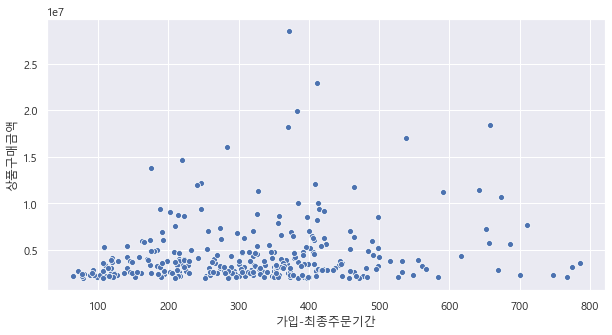

In [131]:
#구매금액이 200만원 이상인 사람들의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.scatterplot(x = "가입-최종주문기간", y = "상품구매금액",data = df_up_200)

# 상품구매금액 - 나이(AgeGroup) (box plot)

In [113]:
# # 금액 구분없는 전체 그래프
# plt.figure(figsize=[30,10])
# sns.set(font_scale=2)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.boxplot(x = "AgeGroup", y = "상품구매금액", data = df_cm)
# plt.show()

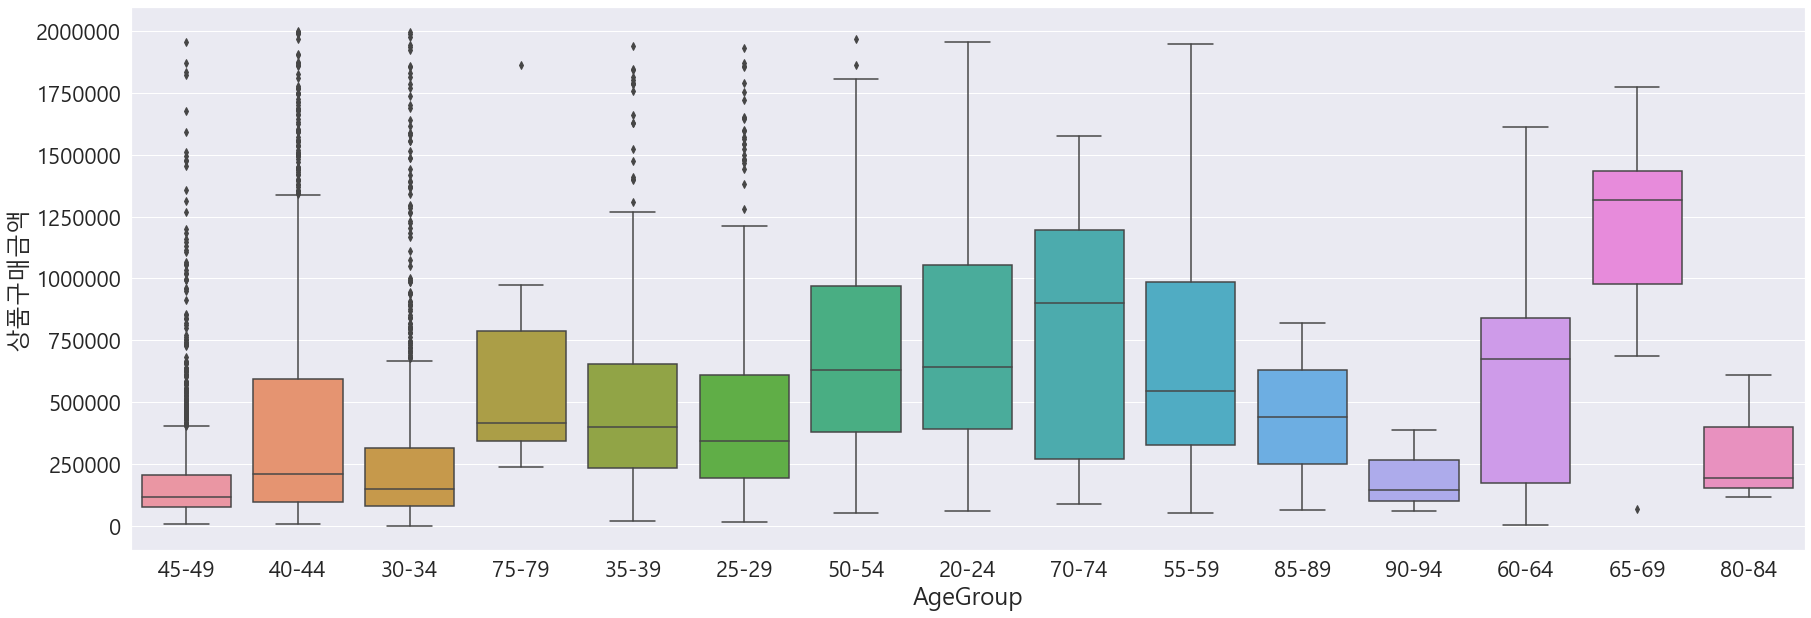

In [110]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[30,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "AgeGroup", y = "상품구매금액", data = df_down_200)
plt.show()

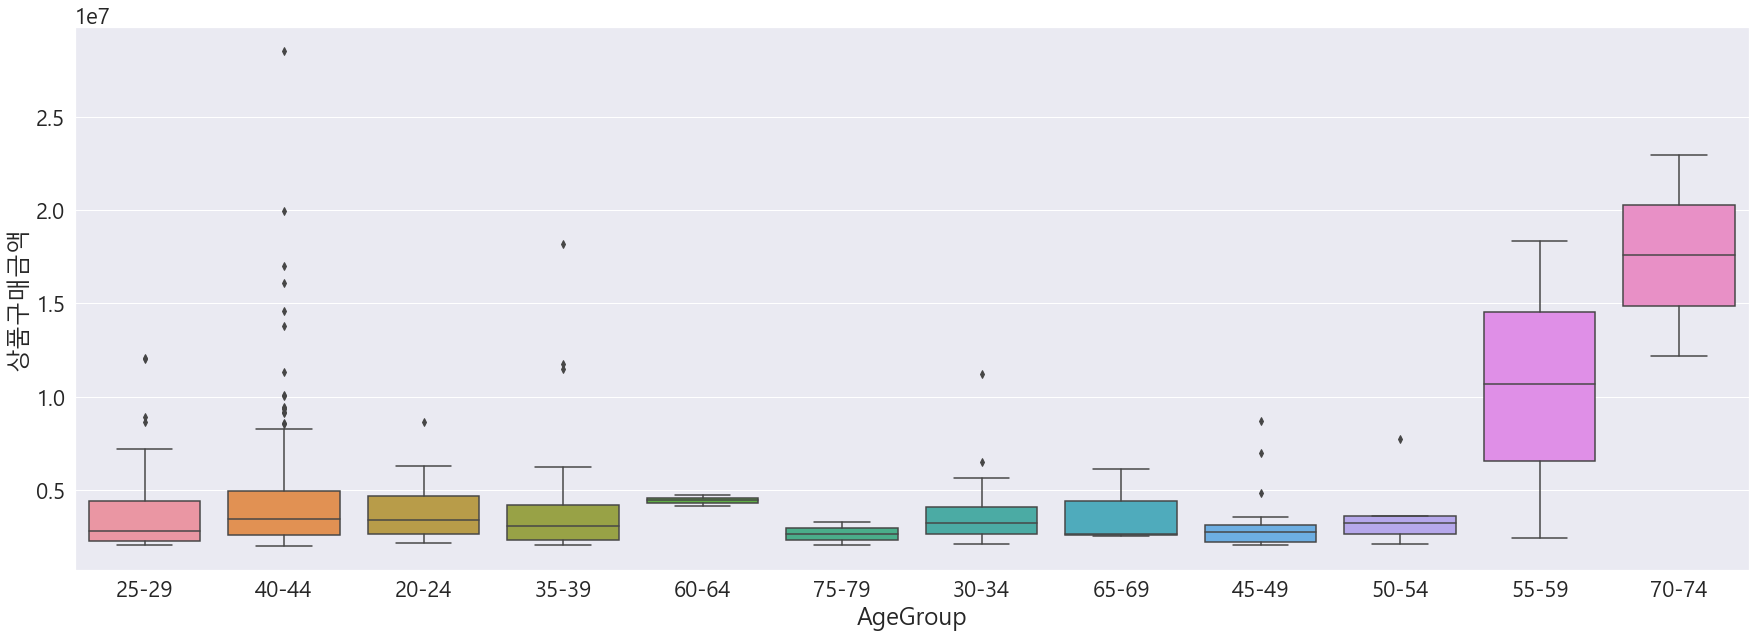

In [114]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[30,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "AgeGroup", y = "상품구매금액", data = df_up_200)
plt.show()

# 상품구매금액 - 성별(box plot)

In [119]:
# # 금액 구분없는 전체 그래프
# plt.figure(figsize=[30,10])
# sns.set(font_scale=2)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.boxplot(x = "성별", y = "상품구매금액", data = df_cm)
# plt.show()

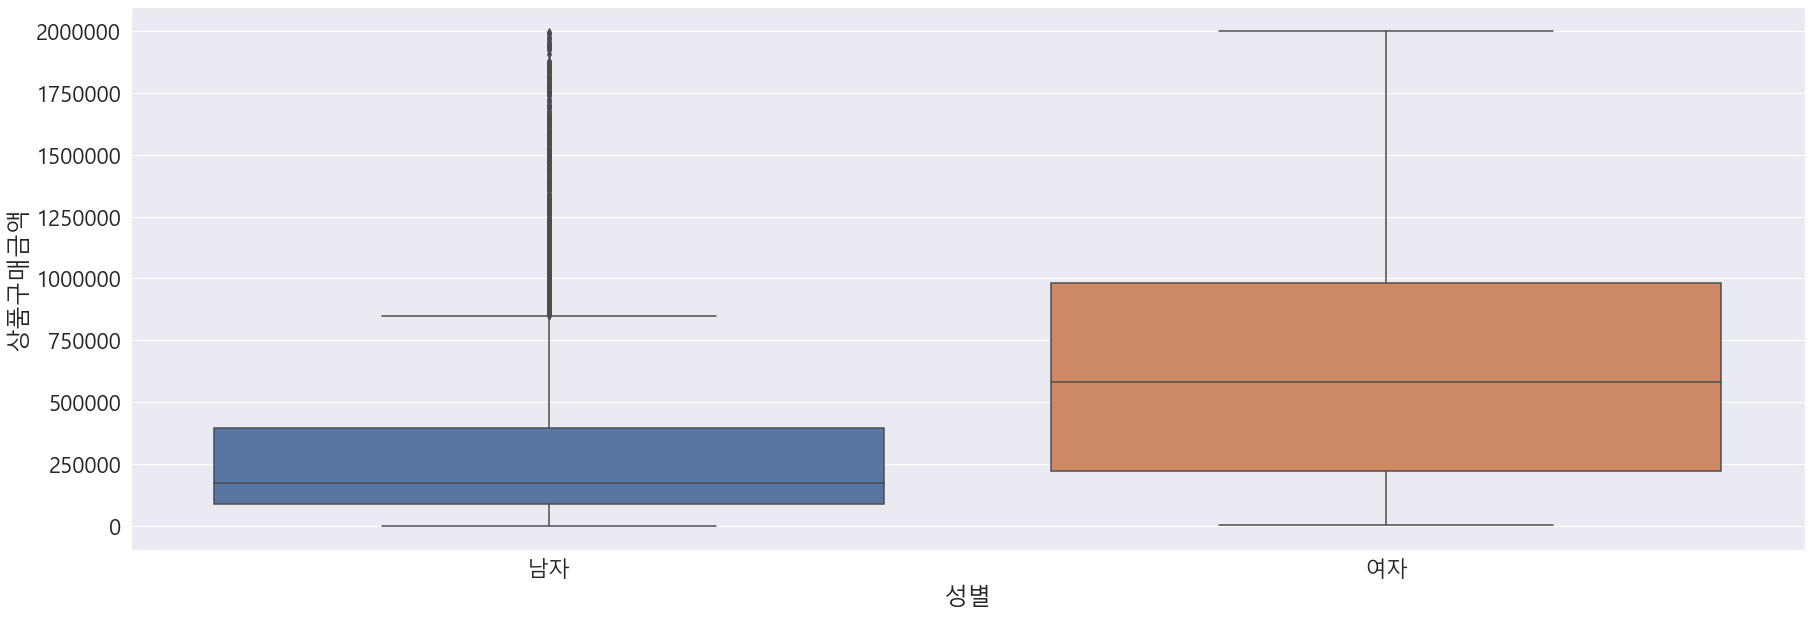

In [117]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[30,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "성별", y = "상품구매금액", data = df_down_200)
plt.show()

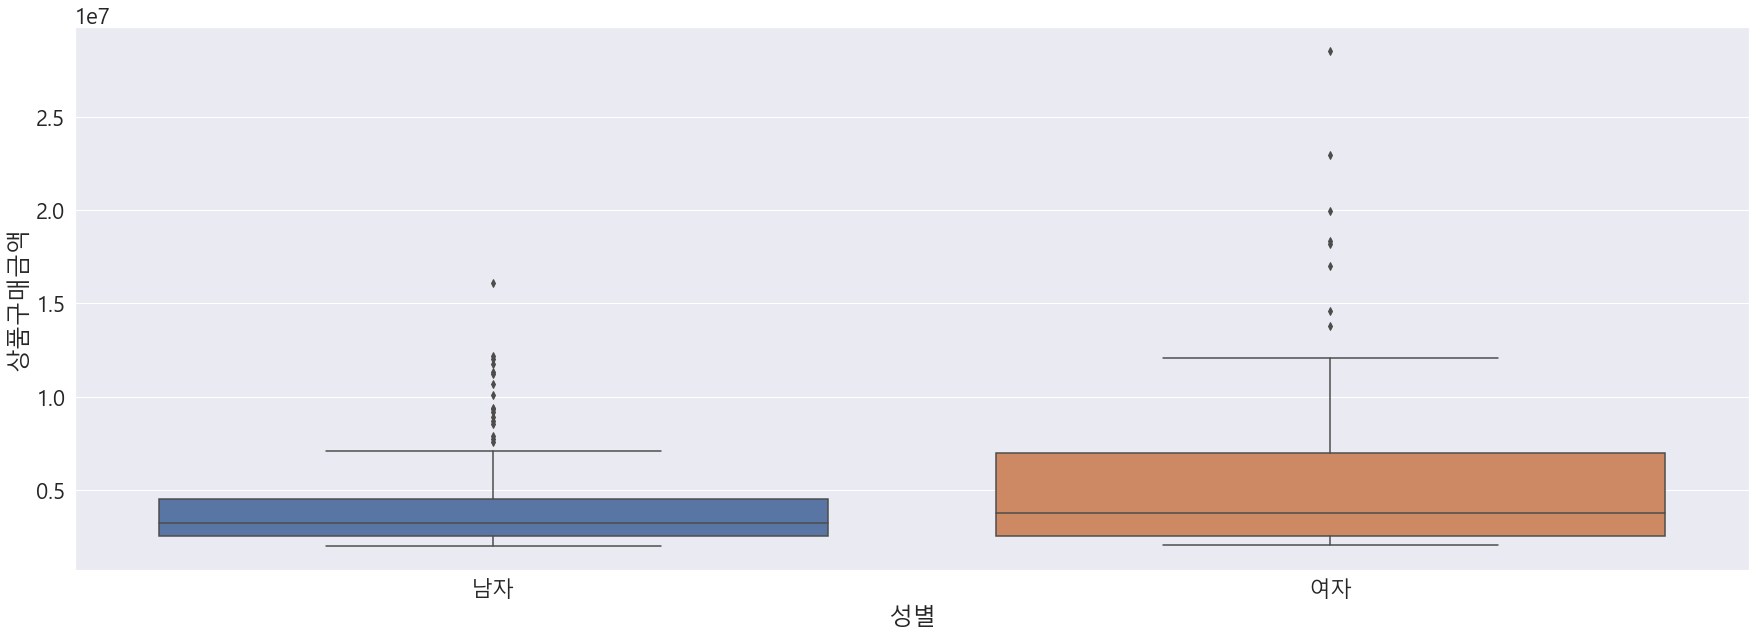

In [118]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[30,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "성별", y = "상품구매금액", data = df_up_200)
plt.show()

# 상품구매금액 - 유입경로 (box plot)

In [ ]:
# #금액 구분없는 전체 그래프
# plt.figure(figsize=[30,10])
# sns.set(font_scale=2)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.boxplot(x = "유입경로", y = "상품구매금액", data = df_cm)
# plt.show()

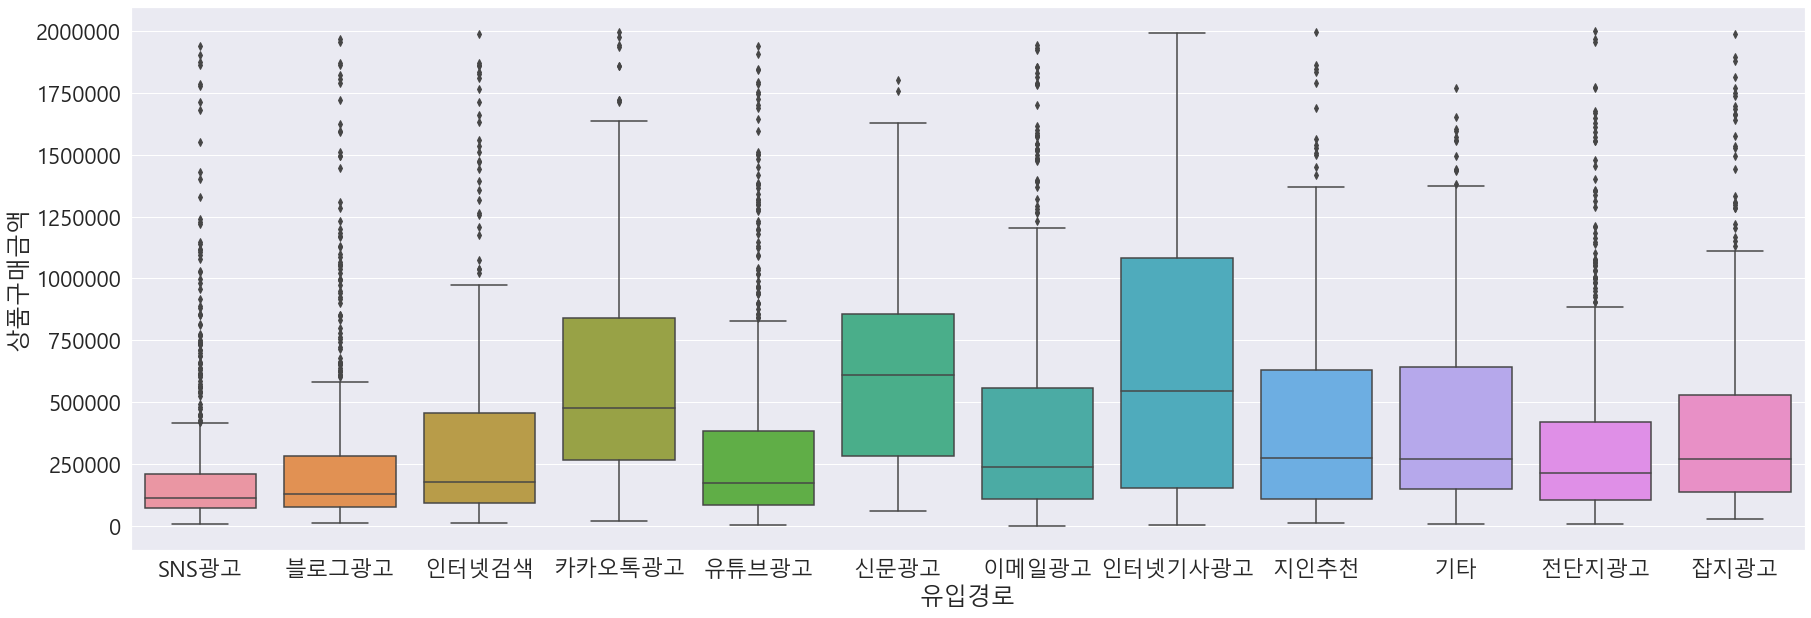

In [99]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[30,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "유입경로", y = "상품구매금액", data = df_down_200)
plt.show()

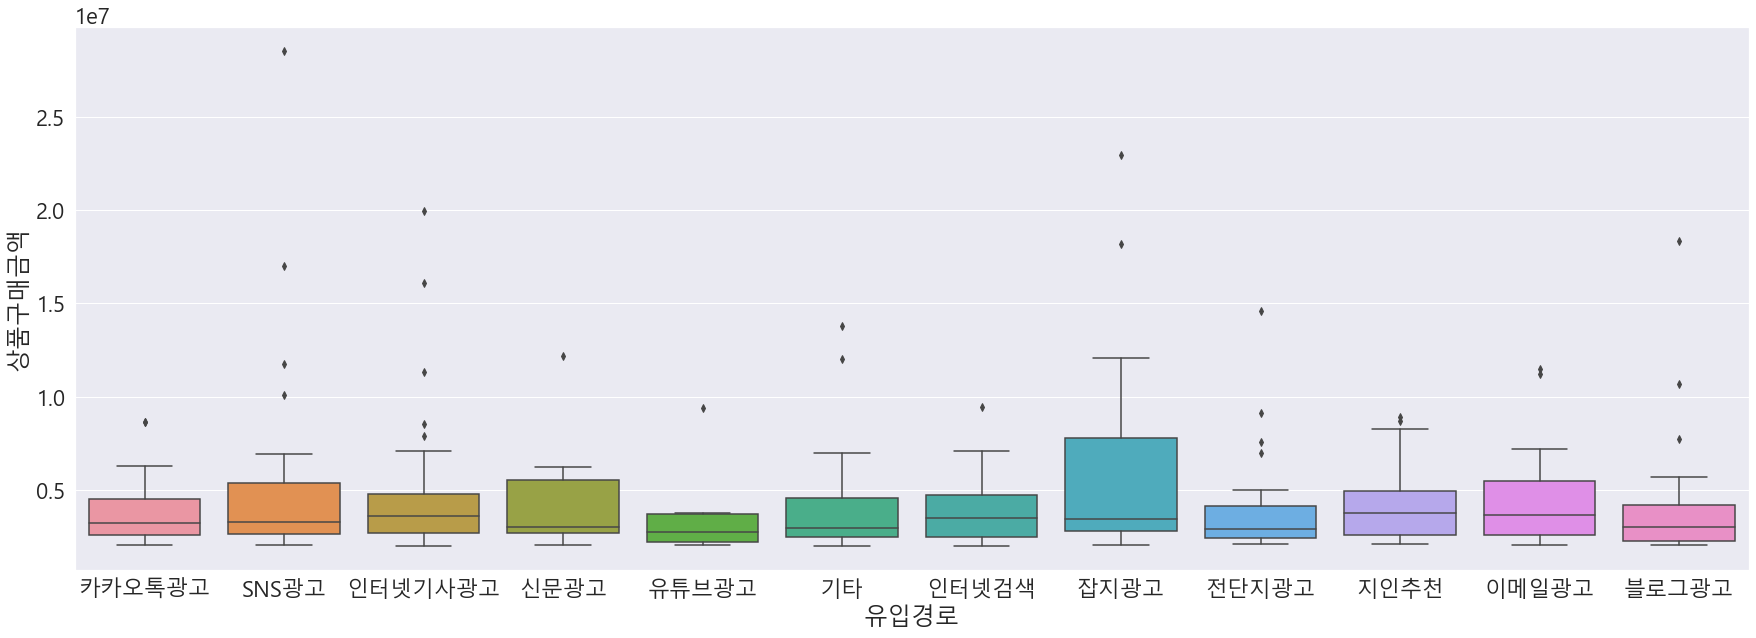

In [96]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[30,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "유입경로", y = "상품구매금액", data = df_up_200)
plt.show()

# 상품구매금액 - 유입기기 (box plot)

In [ ]:
# #금액 구분없는 전체 그래프
# plt.figure(figsize=[10,10])
# sns.set(font_scale=2)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.boxplot(x = "유입기기", y = "상품구매금액", data = df_cm)
# plt.show()

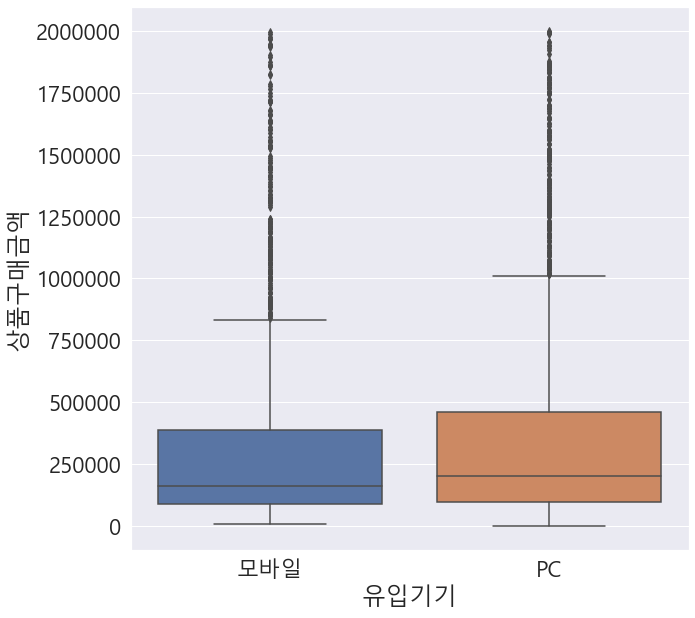

In [92]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[10,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "유입기기", y = "상품구매금액", data = df_down_200)
plt.show()

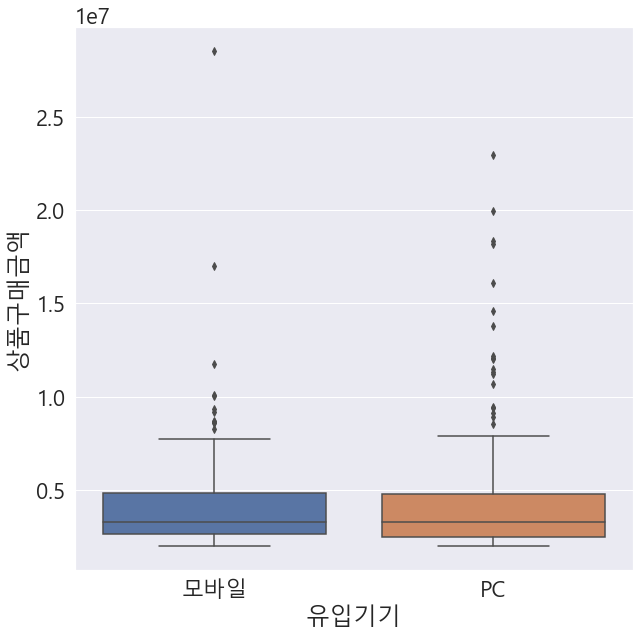

In [93]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[10,10])
sns.set(font_scale=2)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "유입기기", y = "상품구매금액", data = df_up_200)
plt.show()

# 상품구매금액 - 사업자구분 (box plot)

In [108]:
# #금액 구분없는 전체 그래프
# plt.figure(figsize=[10,5])
# sns.set(font_scale=1)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.boxplot(x = "사업자구분", y = "상품구매금액", data = df_cm)
# plt.show()

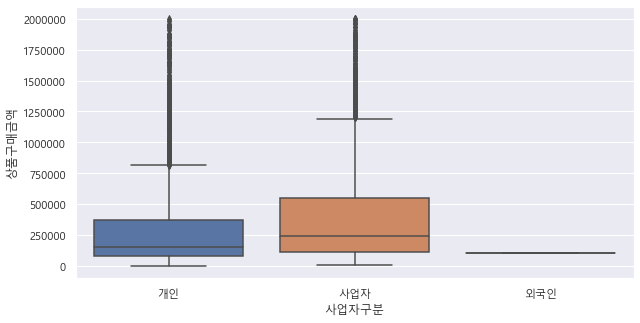

In [103]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "사업자구분", y = "상품구매금액", data = df_down_200)
plt.show()

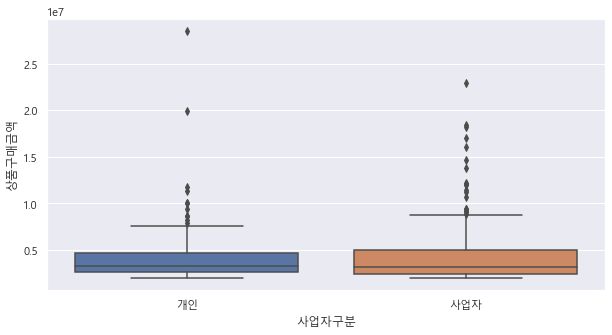

In [105]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "사업자구분", y = "상품구매금액", data = df_up_200)
plt.show()

# 상품구매금액 - 회원구분 (box plot)

In [ ]:
# # 금액 구분없는 전체 그래프
# plt.figure(figsize=[10,5])
# sns.set(font_scale=1)
# plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.boxplot(x = "회원구분", y = "상품구매금액", data = df_cm)
# plt.show()

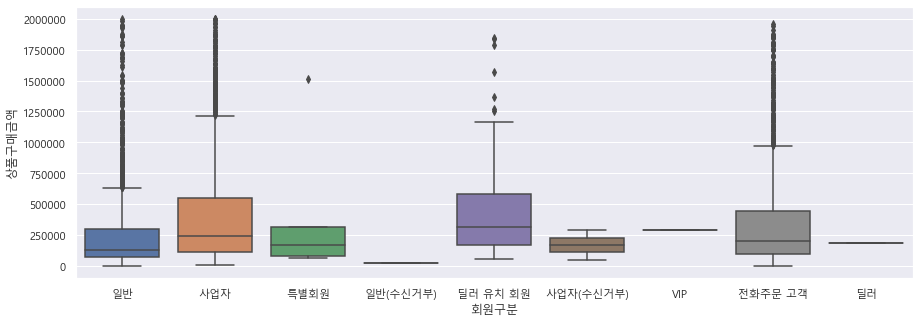

In [124]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[15,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "회원구분", y = "상품구매금액", data = df_down_200)
plt.show()

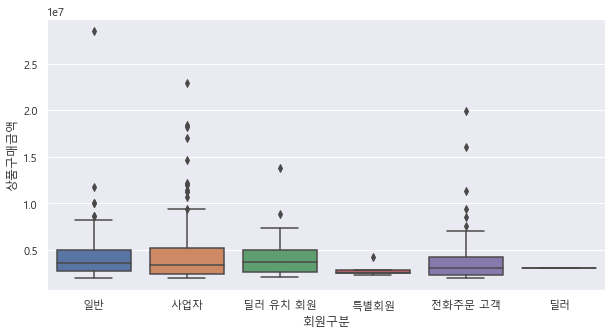

In [125]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "회원구분", y = "상품구매금액", data = df_up_200)
plt.show()

# 상품구매금액 - 지역 (box plot)

In [ ]:
# 금액 구분없는 전체 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "region", y = "상품구매금액", data = df_cm)
plt.show()

In [ ]:
# 상품구매금액이 200만원 이하인 경우의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "region", y = "상품구매금액", data = df_down_200)
plt.show()

In [ ]:
# 상품구매금액이 200만원 이상인 경우의 그래프
plt.figure(figsize=[10,5])
sns.set(font_scale=1)
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.boxplot(x = "region", y = "상품구매금액", data = df_up_200)
plt.show()

In [100]:
df_cm.head()

,주문자ID,상품구매금액,나이,성별,유입경로,유입기기,사업자구분,회원구분,가입-최종주문기간,AgeGroup,region
0,100304734@n,103300,47,남자,SNS광고,모바일,개인,일반,0,45-49,오프라인
1,1003409866@k,4308520,27,남자,카카오톡광고,모바일,개인,일반,141,25-29,서울특별시
2,100381931@n,71050,41,남자,SNS광고,모바일,개인,일반,102,40-44,대구광역시
3,1004498382@k,76400,47,남자,SNS광고,모바일,개인,일반,0,45-49,경기도
4,1004547839@k,360800,47,남자,블로그광고,PC,개인,일반,0,45-49,전라남도
